# UT3 - Práctica 3

## Ejercicio 1

Antes de empezar a trabajar, tendrás que importar las librerías de NumPy y Matplotlib.Pyplot para poder trabajar con ellas:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
## Ejercicio 2

Haz una función que recibiendo una matriz cuadrada de dimensiones impares (siempre tendrá un punto central) de NumPy, devuelva la media de todos sus elementos sin tener en cuenta el valor del punto central:

In [3]:
def mediaSCentral(matriz):
    suma = 0
    f = 0
    for fila in matriz:
        c = 0
        for columna in fila:
            if (f != int(matriz.shape[0]) or c != int(matriz.shape[1]/2)):
                suma += columna
            c += 1
        f += 1
    return suma/(matriz.size-1)

matriz = np.random.randint(10, size=(3,3))

print(mediaSCentral(matriz))

4.625


---
## Ejercicio 3

Crea una función que, utilizando la función definida en el ejercicio 2, "elimine" el ruido de la imagen recibida utilizando una máscara de un tamaño también recibido como parámetro. La función devolverá una copia de la imagen modificada:

In [72]:
def limpiaRuido(matriz, size):
    matrizLimpia = matriz.copy()
    f = 0
    for fila in matrizLimpia:
        c = 0
        for columna in fila:
            print(columna)
            if (columna == 0 or columna == 1):
                matrizLimpia[f,c] = mediaSCentral(matrizLimpia[f-int(size/2):f+int(size/2)+1,c-int(size/2):c+int(size/2)+1])
        c += 1
    f += 1
    return matrizLimpia

# matriz = np.random.randint(10, size=(7,7))
# print(matriz)
# print("-------------------")
# f, c, size = 4,4,3
# otramatriz = matriz[f-int(size/2):f+int(size/2)+1,c-int(size/2):c+int(size/2)+1]
# print(otramatriz)

---
## Ejercicio 4

Importa las imágenes "spn_lenna.png" y "spn_ci_3.png". Visualizalas desde Windows para ver la cantidad de "ruido" que contienen. A continuación, utiliza la función anterior para tratar de eliminar el ruido de ambas utilizando distintos tamaños de máscaras (3,7,21). Guarda todos los resultados obtenidos y compáralos con las imágenes originales ("lenna_gris.png" y "paisaje_gris.png"):

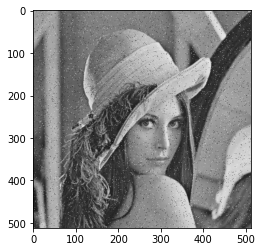

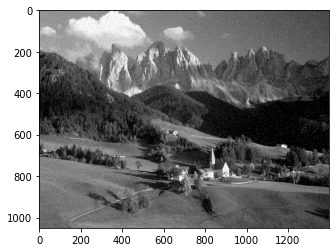

[0.63529414 0.63529414 0.63529414 1.        ]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [73]:
lenna_ruido = plt.imread("03_spn_lenna.png")
ci_ruido = plt.imread("03_spn_ci.png")

plt.imshow(lenna_ruido)
plt.show()
plt.imshow(ci_ruido)
plt.show()

lenna_clean = limpiaRuido(lenna_ruido, 3)

plt.imshow(lenna_clean)
plt.show()

---
## Ejercicio 5

Haz una función similar a la del ejercicio 3 pero aplicando la máscara únicamente de la media únicamente a los píxeles con ruido (100% blancos o negros):

---
## Ejercicio 6

Importa las imágenes "spn_lenna.png" y "spn_ci_3.png". Visualizalas desde Windows para ver la cantidad de "ruido" que contienen. A continuación, utiliza la función anterior (ejercicio 5) para tratar de eliminar el ruido de ambas utilizando distintos tamaños de máscaras (3,7,21). Guarda todos los resultados obtenidos y compáralos con las imágenes originales ("lenna_gris.png" y "paisaje_gris.png"):

---
## Ejercicio 7

Haz un análisis de todo lo que has averiguado, aprendido... (tiempos de ejecución, cómo afectan los tamaños de máscaras, comparativa entre la función del ejercicio 4 y el 6...) y déjalo por escrito en la siguiente casilla: